# 1. Inspecting your data

If you want to solve a problem with machine learning, you'll need three things:

1. A good dataset;
2. A good model;
3. A good optimization algorithm.

If any of these three is not good enough, your trained model won't be good either. Many novice machine learning practitioners mainly focus on the second requirement, i.e., the model. While a good model certainly is a vital aspect of a succesful machine learning pipeline, if your data sucks, it doesn't really matter how advanced your model is. **The model can only be as good as the data.**

Therefore, your first step in a machine learning project should always be to **inspect your data**. And that's exactly what we'll do now!

## 1.1 Inspecting the filetree

Before you can start inspecting the data itself, you need to know how and where your data is stored.

For this example, download the [https://www.kaggle.com/datasets/asaniczka/mammals-image-classification-dataset-45-animals], extract it and move it to the parent directory of this notebook. Rename the folder from `archive` to `mammals`.

We'll now inspect what's inside the `mammals` directory. For this, you can use the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module from the Python standard library. A [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html#pathlib.Path) object is an abstract representation of a path (e.g., to a file or directory) in your operating system.

Let's create a `Path` object for the `mammals` directory.

In [4]:
from pathlib import Path

data_path = Path('../data/mammals')

To inspect the files in the directory, we can employ the [`glob()` method of the `Path` class](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob). This method expects a *pattern* and returns all paths that match the given pattern. In this pattern, an asterisk (`*`) is interpreted as a wildcard. So, to list all files in the `mammals` directory, we can pass in the pattern `*`:

In [5]:
data_path.glob('*')

<generator object Path.glob at 0x7f3caac9fed0>

This will give you something like `<generator object Path.glob at 0x............>`. Indeed, the `glob()` method returns a Python [generator](https://wiki.python.org/moin/Generators), not a list. A generator is an object you can iterate over (just like a list) but that (unlike a list) cannot be indexed. A generator can only tell you the *next* iteration item.

> The advantage of generators is that they don't need to store all iteration items up-front. If the iteration items are large, or if there is a large number of items, a generator can save large amounts of memory.

To get the next item in a generator, you can use [the built-in Python function `next()`](https://docs.python.org/3/library/functions.html#next):

In [6]:
paths_generator = data_path.glob('*')
next(paths_generator)

PosixPath('../data/mammals/data')

Once you have iterated over all items, the generator can be considered *empty* and it will raise a [`StopIteration`](https://docs.python.org/3/library/exceptions.html#StopIteration) exception if you attempt to call `next()` with it.

In [7]:
next(paths_generator)

StopIteration: 

The `StopIteration` is already raised with our second `next()` call, so we know that there is only one subdirectory in the `mammals` directory.

Of course, calling `next()` over and over on a generator that contains a lot of items is cumbersome. Luckily, we can also *iterate* over a generator with a simple `for` loop.

> ⚠️ **Only use new generators in `for` loops**
>
> You can think of iterating over a generator with a `for` loop as simply calling `next()` over and over, passing in the generator as an argument and stopping once a `StopIteration` exception is raised. If you have already called `next()` on the generator object, the `for` loop will start wherever the generator left off. **A for loop does not *rewind* a generator before it starts iterating!** (Btw, there is no such thing as *rewinding* a generator. Once an iteration item is returned, the generator forgets about it.) Therefore, to avoid subtle bugs, it is important to only use freshly created generators in `for` loops.

In [8]:
paths_generator = data_path.glob('*')

for p in paths_generator:
    print(p)

../data/mammals/data


We can also collect all iteration items of a generator in a list by passing the generator to the [built-in function](https://docs.python.org/3/library/functions.html) [`list()`](https://docs.python.org/3/library/functions.html#func-list)...

In [9]:
list(data_path.glob('*'))

[PosixPath('../data/mammals/data')]

...or by employing a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp):

In [10]:
[p for p in data_path.glob('*')]

[PosixPath('../data/mammals/data')]

As we saw from the previous cells, the `mammals` directory only contains a single directory, i.e., `mammals/data`. Let's inspect this directory as well:

In [11]:
list(data_path.glob('data/*'))

[PosixPath('../data/mammals/data/alpaca'),
 PosixPath('../data/mammals/data/anteater'),
 PosixPath('../data/mammals/data/red_panda'),
 PosixPath('../data/mammals/data/giraffe'),
 PosixPath('../data/mammals/data/horse'),
 PosixPath('../data/mammals/data/seal'),
 PosixPath('../data/mammals/data/wildebeest'),
 PosixPath('../data/mammals/data/kangaroo'),
 PosixPath('../data/mammals/data/highland_cattle'),
 PosixPath('../data/mammals/data/baboon'),
 PosixPath('../data/mammals/data/warthog'),
 PosixPath('../data/mammals/data/yak'),
 PosixPath('../data/mammals/data/opossum'),
 PosixPath('../data/mammals/data/weasel'),
 PosixPath('../data/mammals/data/snow_leopard'),
 PosixPath('../data/mammals/data/arctic_fox'),
 PosixPath('../data/mammals/data/tapir'),
 PosixPath('../data/mammals/data/polar_bear'),
 PosixPath('../data/mammals/data/brown_bear'),
 PosixPath('../data/mammals/data/otter'),
 PosixPath('../data/mammals/data/african_elephant'),
 PosixPath('../data/mammals/data/groundhog'),
 PosixPa

We can see that `mammals/data` contains a large number of subdirectories that correspond to different mammals names. How many mammals does our dataset contain?

In [12]:
len(list(data_path.glob('data/*')))

45

We can inspect the total number of files that is in one of the subdirectories

In [13]:
file_paths = list(data_path.glob('data/*/*'))
len(file_paths)

13751

As these file paths are also represented with `pathlib.Path` objects, we can easily extract useful properties of the image paths, like the name, extension, stem, parent path,...

In [14]:
path = file_paths[0]
path

PosixPath('../data/mammals/data/alpaca/alpaca-0222.jpg')

In [15]:
str(path)

'../data/mammals/data/alpaca/alpaca-0222.jpg'

In [16]:
path.name

'alpaca-0222.jpg'

In [17]:
path.suffix

'.jpg'

The `stem` is the path's name without suffix:

In [18]:
path.stem

'alpaca-0222'

The `parent` attribute gives the path of the parent directory:

In [19]:
path.parent

PosixPath('../data/mammals/data/alpaca')

Note that we can get the mammals name from the name of the parent directory.

In [20]:
path.parent.name

'alpaca'

We can also inspect the file extensions of all these files:

In [21]:
exts = set()

for p in data_path.glob('data/*/*'):
    exts.add(p.suffix)

exts

{'.jpg'}

Or, with a set comprehension:

In [22]:
{p.suffix for p in data_path.glob('data/*/*')}

{'.jpg'}

From the above cells, we know that the subdirectories contain files with `.jpg` and `.png` extensions. In other words, when globbing the `mammals/data` directory, we'll get **13 751 images**.

## 1.2 Representing the dataset as a `DataFrame`

We're starting to get a feeling of how the files in the dataset are structured. The folder `mammals` contains a subdirectory `data`, and this directory contains multiple subdirectories, each of which corresponds to a mammals. The mammals directories contain files that have either a `.jpg` or a `.png` extension (i.e., images).

With `pathlib`'s `glob()`, we can explore our dataset in a rudimentary way. To understand our data more deeply, we can represent our dataset as a [`DataFrame` object from the `pandas` library](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). A DataFrame is a tabular data structure consisting of rows and columns, much like an Excel sheet.

We want to create a DataFrame that contains two columns: `image` and `label`. The `image` column contains the path to an image of a mammals, and the `label` column contains the corresponding name of that mammals.

You can construct a `DataFrame` by passing in a list of dictionaries. Each dictionary in the list corresponds to a row in the DataFrame. The dictionary keys correspond to column names, and the values to the value that should be in the table cell of that column and row.

For example:

In [23]:
import pandas as pd

pd.DataFrame([
    {'image': 'mammals/data/alpaca/alpaca-0001.jpg', 'label': 'alpaca'},
    {'image': 'mammals/data/american_bison/american_bison-0001.jpg', 'label': 'american_bison'},
    {'image': 'mammals/data/anteater/anteater-0001.jpg', 'label': 'anteater'},
])

image           label
0                mammals/data/alpaca/alpaca-0001.jpg          alpaca
1  mammals/data/american_bison/american_bison-000...  american_bison
2            mammals/data/anteater/anteater-0001.jpg        anteater

We can iterate over all available data and store the image paths along with the mammals names.

In [24]:
rows = []

for img_path in data_path.glob('data/*/*'):
    rows.append({
        'image': str(img_path),
        'label': img_path.parent.name
    })

df = pd.DataFrame(rows)

In [25]:
df

image     label
0          ../data/mammals/data/alpaca/alpaca-0222.jpg    alpaca
1          ../data/mammals/data/alpaca/alpaca-0303.jpg    alpaca
2          ../data/mammals/data/alpaca/alpaca-0169.jpg    alpaca
3          ../data/mammals/data/alpaca/alpaca-0060.jpg    alpaca
4          ../data/mammals/data/alpaca/alpaca-0275.jpg    alpaca
...                                                ...       ...
13746  ../data/mammals/data/sea_lion/sea_lion-0207.jpg  sea_lion
13747  ../data/mammals/data/sea_lion/sea_lion-0254.jpg  sea_lion
13748  ../data/mammals/data/sea_lion/sea_lion-0026.jpg  sea_lion
13749  ../data/mammals/data/sea_lion/sea_lion-0168.jpg  sea_lion
13750  ../data/mammals/data/sea_lion/sea_lion-0059.jpg  sea_lion

[13751 rows x 2 columns]

Of course, you can also create the same DataFrame with a list comprehension:

In [26]:
df = pd.DataFrame([
    {
        'image': str(img_path),
        'label': img_path.parent.name
    }
    for img_path in data_path.glob('data/*/*')
])

## 1.3 Visualizing data imbalance

A common problem in machine learning is *data imbalance*. This means that some classes have much more examples than others. Such an imbalance could cause a difference in model performance on the majority classes vs. the minority classes.

To visualize the number of images per class, we can use the plotting library [Matplotlib](https://matplotlib.org/).

In Matplotlib, plots are drawn on [`Figure`s](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure). A `Figure` contains one or more [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), which is an area that will contain the actual plot.

To create a `Figure` with a single `Axes`, you can call [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) without any arguments.

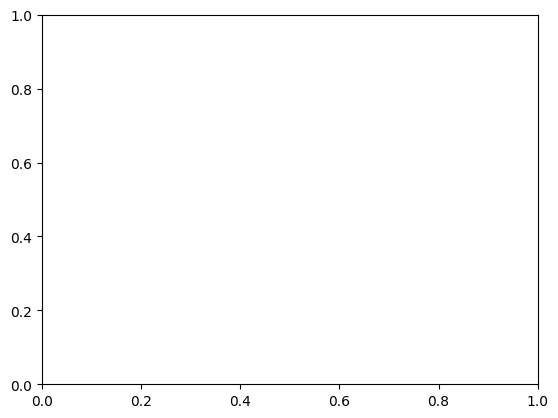

In [27]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

Now, we'll use the [`DataFrame.groupby()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to group the rows by `label` and apply [the built-in `len()` function](https://docs.python.org/3/library/functions.html#len) on each group to get the number of images per label.

In [28]:
df.groupby('label').apply(len)

label
african_elephant    347
alpaca              333
american_bison      343
anteater            299
arctic_fox          315
armadillo           331
baboon              330
badger              310
blue_whale          243
brown_bear          300
camel               254
dolphin             311
giraffe             305
groundhog           309
highland_cattle     311
horse               303
jackal              278
kangaroo            317
koala               319
manatee             333
mongoose            287
mountain_goat       328
opossum             330
orangutan           340
otter               349
polar_bear          356
porcupine           321
red_panda           329
rhinoceros          274
sea_lion            333
seal                327
snow_leopard        350
squirrel            325
sugar_glider        253
tapir               317
vampire_bat         239
vicuna              215
walrus              284
warthog             259
water_buffalo       314
weasel              282
wildebeest

Let's put this in a variable called `count_per_label`:

In [29]:
count_per_label = df.groupby('label').apply(len)

Now we want to draw a bar chart in our `Axes` with the labels as x-values and the counts as bar height.

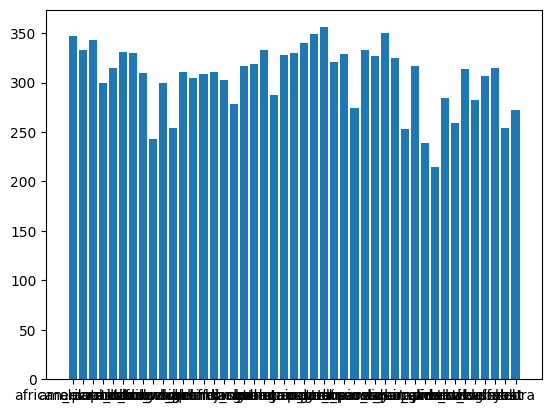

In [30]:
ax.bar(x=count_per_label.index, height=count_per_label.values)
fig

Woops, that looks pretty cluttered. Let's try with a larger figure.

<BarContainer object of 45 artists>

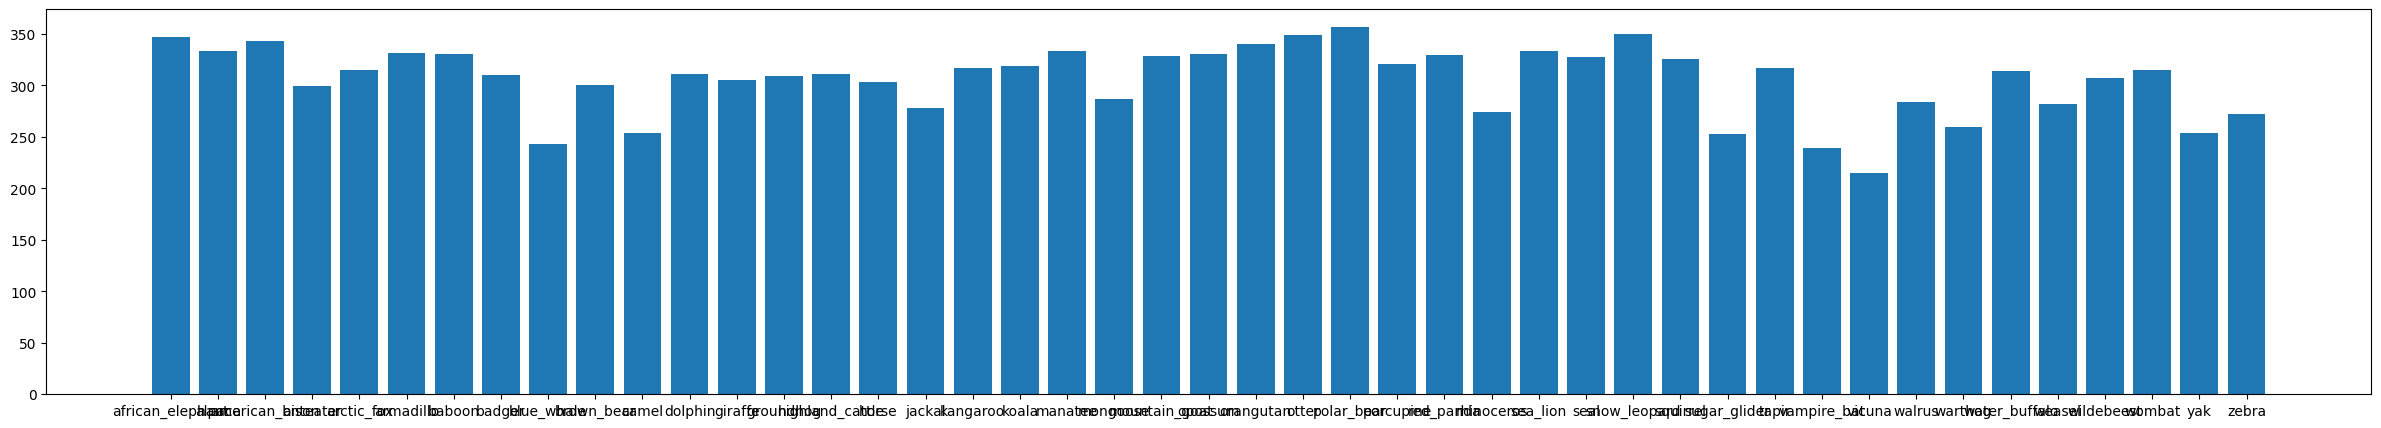

In [31]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.bar(x=count_per_label.index, height=count_per_label.values)

The bars are much clearer now, but the tick labels are still overlapping... We can *rotate* the tick labels with [`Axes.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html):

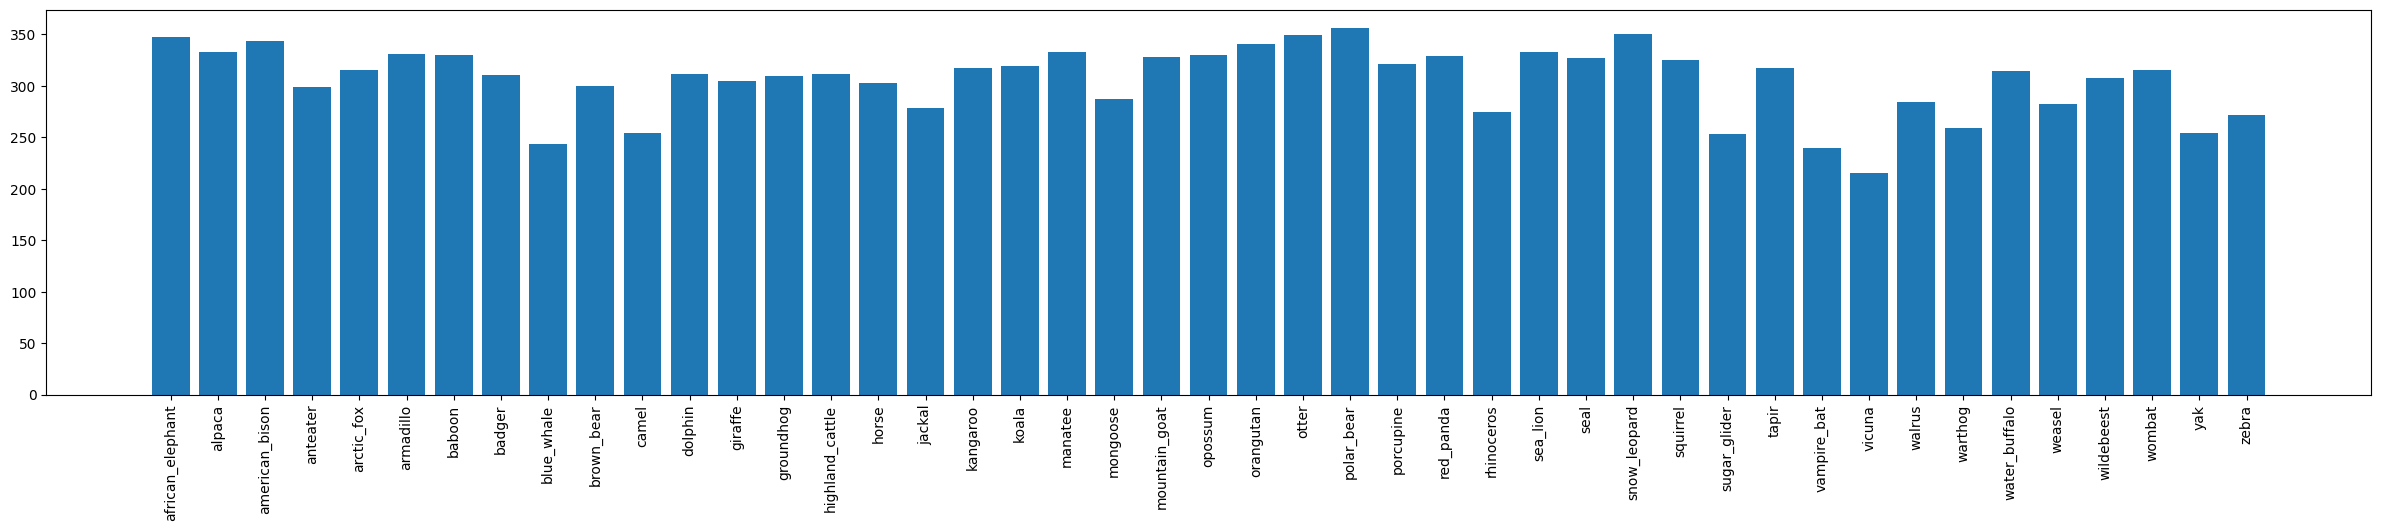

In [32]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.bar(x=count_per_label.index, height=count_per_label.values)
ax.tick_params(axis='x', labelrotation=90)

That's much more readable! To get a real sense of the data imbalance, it's best to **sort the labels in descending order of size**. You can do this by calling [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html) on `count_per_label`.

In [33]:
count_per_label = count_per_label.sort_values(ascending=False)
count_per_label

label
polar_bear          356
snow_leopard        350
otter               349
african_elephant    347
american_bison      343
orangutan           340
manatee             333
sea_lion            333
alpaca              333
armadillo           331
opossum             330
baboon              330
red_panda           329
mountain_goat       328
seal                327
squirrel            325
porcupine           321
koala               319
tapir               317
kangaroo            317
arctic_fox          315
wombat              315
water_buffalo       314
dolphin             311
highland_cattle     311
badger              310
groundhog           309
wildebeest          307
giraffe             305
horse               303
brown_bear          300
anteater            299
mongoose            287
walrus              284
weasel              282
jackal              278
rhinoceros          274
zebra               272
warthog             259
camel               254
yak                 254
sugar_glid

Let's see what we get now...

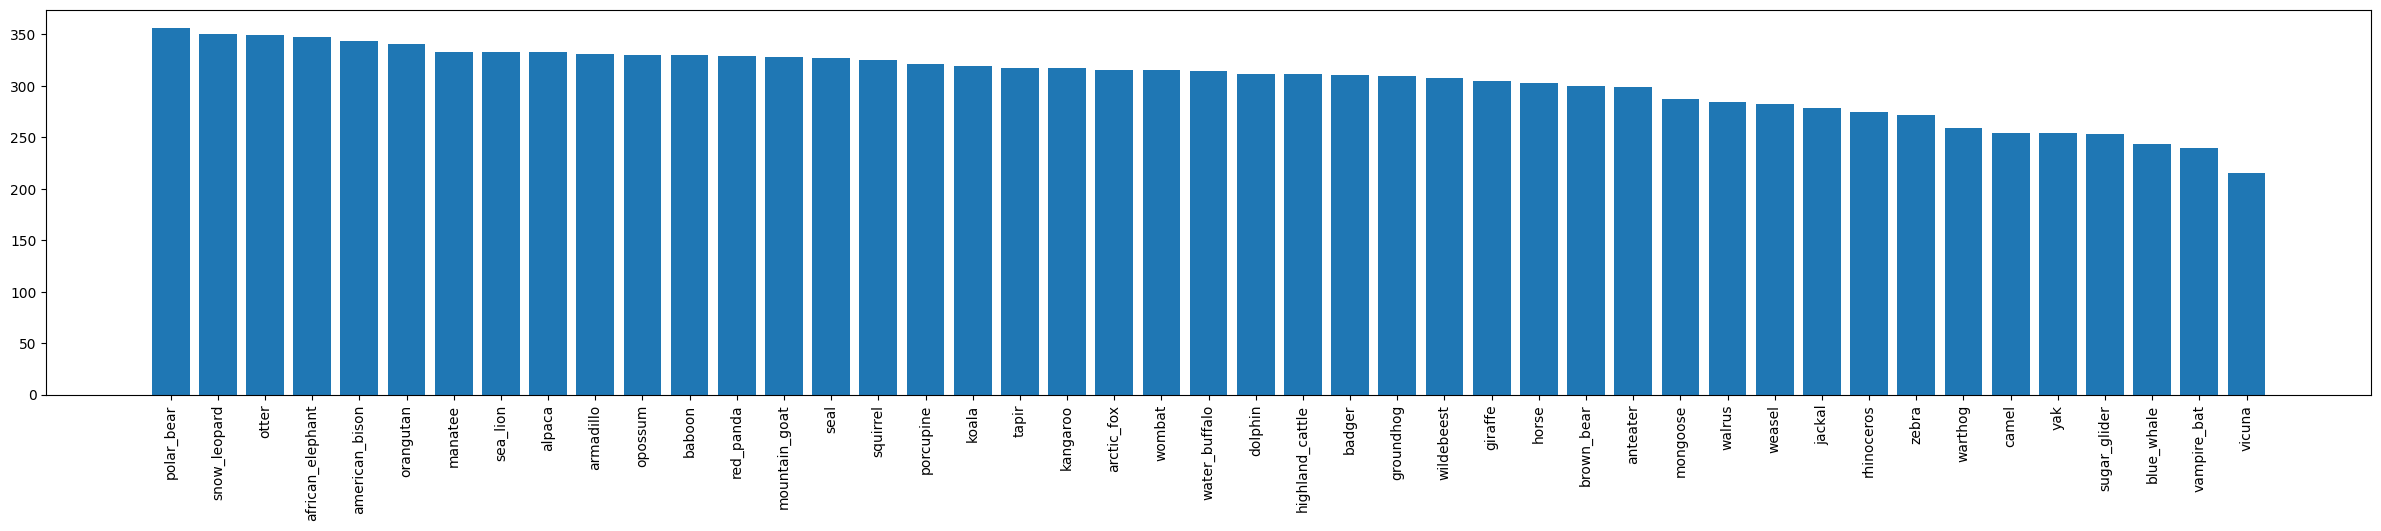

In [34]:
fig, ax = plt.subplots(figsize=(30, 5))

ax.bar(count_per_label.index, count_per_label.values)
ax.tick_params(axis='x', labelrotation=90)

Let's put everything together.

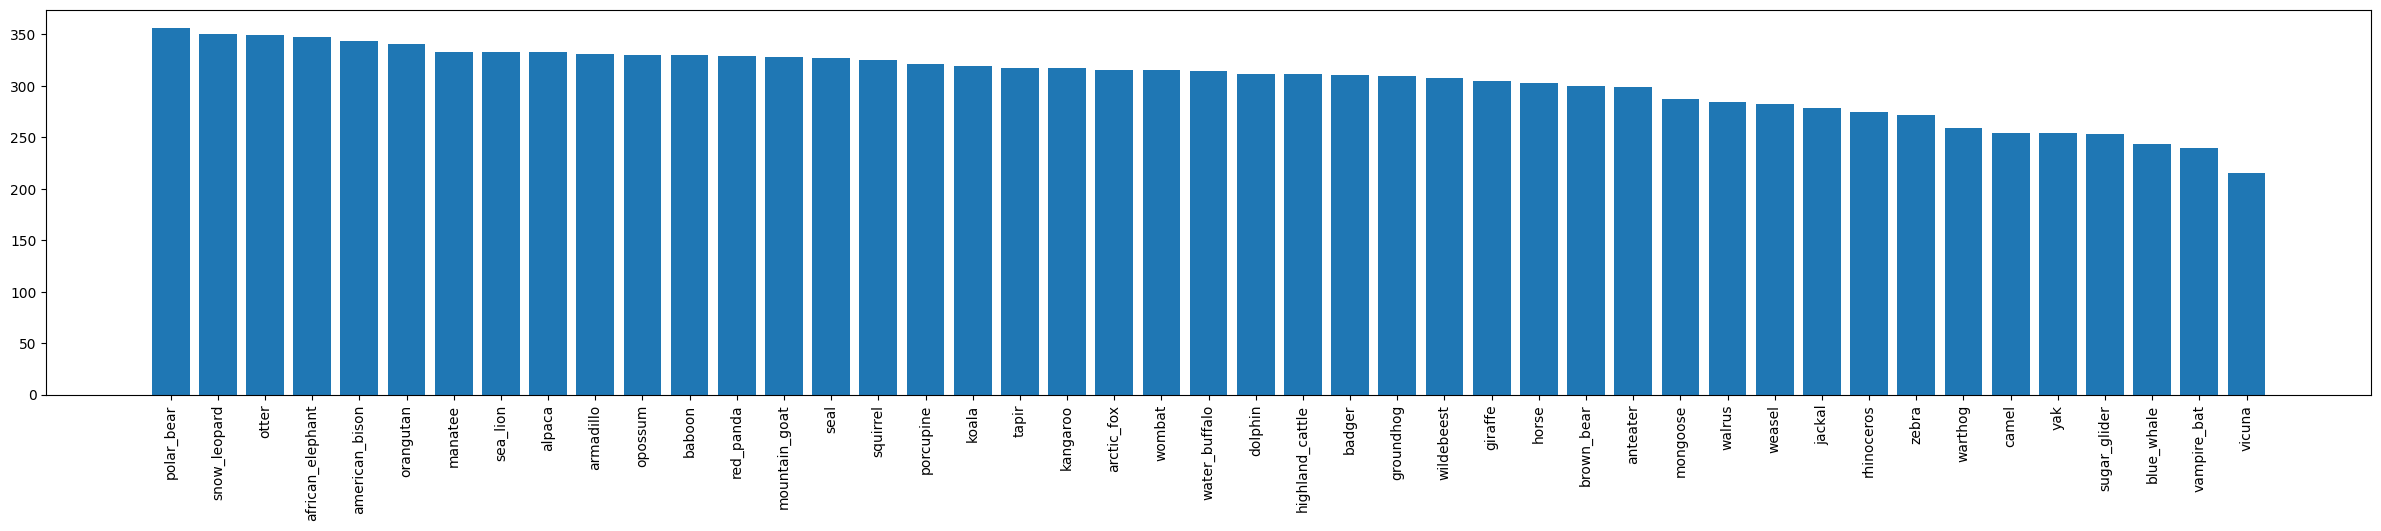

In [35]:
fig, ax = plt.subplots(figsize=(30, 5))

count_per_label = df.groupby('label').apply(len).sort_values(ascending=False)

ax.bar(count_per_label.index, count_per_label.values)
ax.tick_params(axis='x', labelrotation=90)

Now, you should be careful drawing too many conclusions from this graph alone. It is not necessarily true that our model won't work on minority classes. However, the data imbalance we observe is something to take into account when evaluating a trained model, and it might push us toward data sampling strategies to counter the imbalance, if necessary.

To get an even better intuition of our data, let's take a look at some images!

## 1.4 Inspecting images and labels
### 1.4.1 Visualizing a single image

Let's visualize the first image in our dataset.

To obtain the elements of a column in a DataFrame, you can pass in the column name between square brackets.

In [36]:
df['image']

0            ../data/mammals/data/alpaca/alpaca-0222.jpg
1            ../data/mammals/data/alpaca/alpaca-0303.jpg
2            ../data/mammals/data/alpaca/alpaca-0169.jpg
3            ../data/mammals/data/alpaca/alpaca-0060.jpg
4            ../data/mammals/data/alpaca/alpaca-0275.jpg
                              ...                       
13746    ../data/mammals/data/sea_lion/sea_lion-0207.jpg
13747    ../data/mammals/data/sea_lion/sea_lion-0254.jpg
13748    ../data/mammals/data/sea_lion/sea_lion-0026.jpg
13749    ../data/mammals/data/sea_lion/sea_lion-0168.jpg
13750    ../data/mammals/data/sea_lion/sea_lion-0059.jpg
Name: image, Length: 13751, dtype: object

The returned object is a pandas [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object. This is somewhat comparable to a list. To get the value of the `image` column at row `0`, you can index with `[0]`.

In [37]:
df['image'][0]

'../data/mammals/data/alpaca/alpaca-0222.jpg'

Now, we can use [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) to open the image.

In [38]:
from PIL import Image

img_path = df['image'][0]
img = Image.open(img_path)

As you can see, our image is represented as a PyTorch tensor of shape $\text{Channels}\times\text{Height}\times\text{Width}$, or simply $\text{C}\times\text{H}\times\text{W}$. To visualize this tensor, we can also use Matplotlib.

Let's create another `Figure` with a single `Axes`.

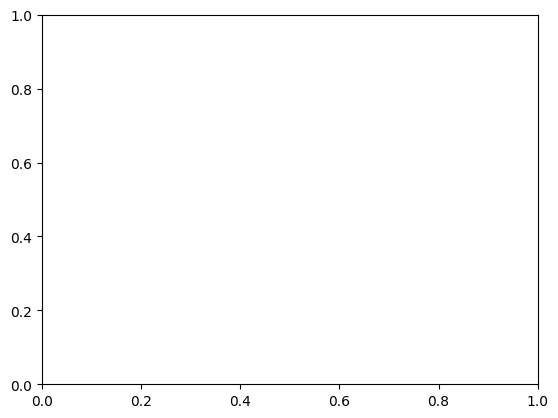

In [39]:
fig, ax = plt.subplots()

Now, we can draw our image on the `Axes` with [`Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html).

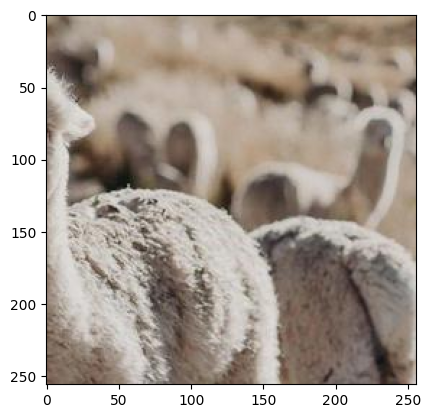

In [40]:
ax.imshow(img)  # C, H, W -> H, W, C
fig

To remove the ticks and tick labels, we can use [`Axes.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

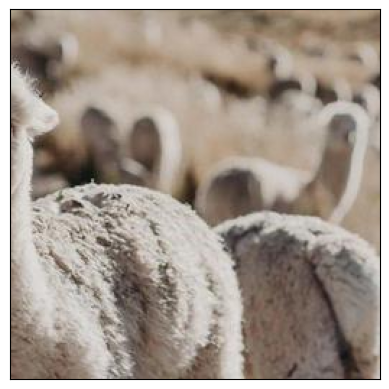

In [41]:
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
fig

And to remove the contouring black lines, we make the [*spines* of the `Axes`](https://matplotlib.org/stable/api/spines_api.html) invisible.

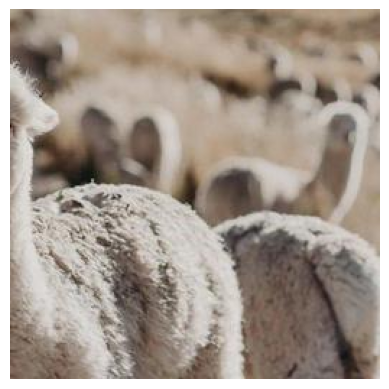

In [42]:
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
fig

Putting it all together, we have:

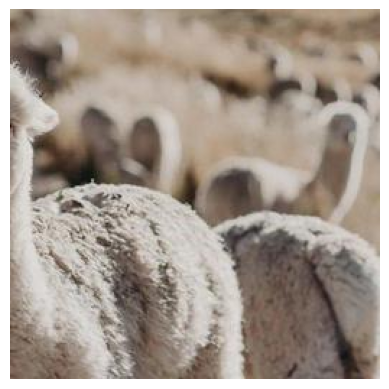

In [43]:
fig, ax = plt.subplots()

img = Image.open(img_path)
ax.imshow(img)
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

### 1.4.2 Visualizing multiple images

Instead of viewing images one by one, we can save some time by visualizing a **grid** of images. To get the first 10 image paths in the DataFrame, we can run the following:

In [44]:
df['image'][:15]

0     ../data/mammals/data/alpaca/alpaca-0222.jpg
1     ../data/mammals/data/alpaca/alpaca-0303.jpg
2     ../data/mammals/data/alpaca/alpaca-0169.jpg
3     ../data/mammals/data/alpaca/alpaca-0060.jpg
4     ../data/mammals/data/alpaca/alpaca-0275.jpg
5     ../data/mammals/data/alpaca/alpaca-0147.jpg
6     ../data/mammals/data/alpaca/alpaca-0293.jpg
7     ../data/mammals/data/alpaca/alpaca-0042.jpg
8     ../data/mammals/data/alpaca/alpaca-0327.jpg
9     ../data/mammals/data/alpaca/alpaca-0257.jpg
10    ../data/mammals/data/alpaca/alpaca-0309.jpg
11    ../data/mammals/data/alpaca/alpaca-0330.jpg
12    ../data/mammals/data/alpaca/alpaca-0244.jpg
13    ../data/mammals/data/alpaca/alpaca-0317.jpg
14    ../data/mammals/data/alpaca/alpaca-0030.jpg
Name: image, dtype: object

To visualize the image paths in this `Series` object, we'll need **multiple `Axes`** in our `Figure`. You can pass a number of rows (`nrows`) and a number of columns (`ncols`) to [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots).

For example, to create a `Figure` with 10 `Axes` in a 2 x 5 grid, you can do:

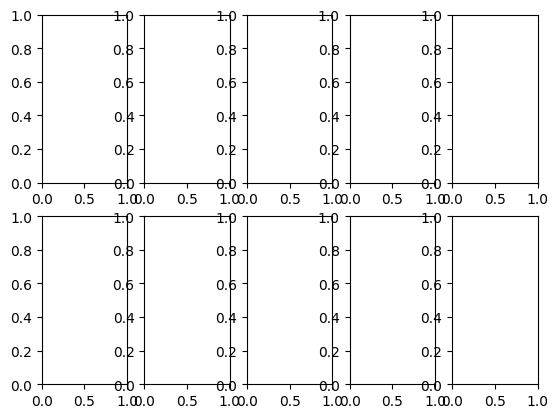

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=5)

The returned `axes` is a $2\times 5$ [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) of `Axes` objects:

In [46]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

We now want to call `imshow()` on each of these `Axes` objects, each time with another image we read in with `Image.open()`. To avoid nasty index computations, we can simply flatten our `axes` array, to get a flat numpy array of $10$ `Axes` objects:

In [47]:
axes.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

Now, we can iterate jointly over these 10 `Axes` objects and the first 10 image paths in our DataFrame. Such a joint iteration is easily done with [Python's built-in function `zip()`](https://docs.python.org/3/library/functions.html#zip).

In the loop itself, we can reuse our code to visualize a single image.

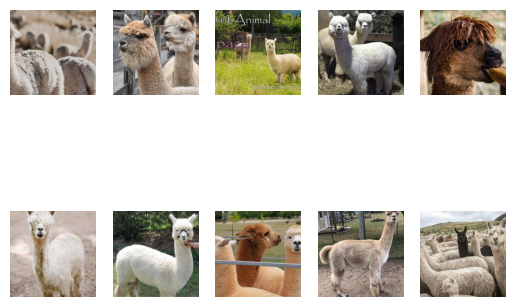

In [48]:
img_paths = df['image'][:10]

fig, axes = plt.subplots(nrows=2, ncols=5)

for ax, img_path in zip(axes.flatten(), img_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

You can call [`Figure.tight_layout()`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout) to reduce the padding between the `Axes`.

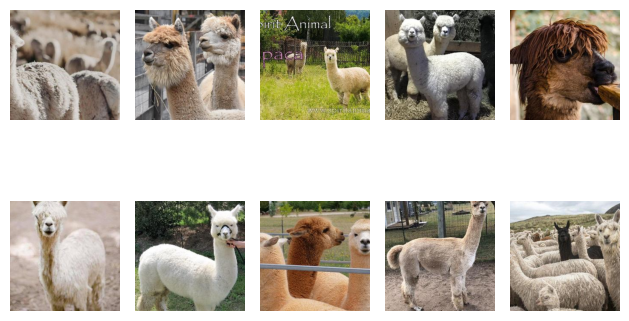

In [49]:
fig.tight_layout()
fig

We can also draw random samples from our DataFrame:

In [50]:
df.sample(5)

image      label
12815  ../data/mammals/data/armadillo/armadillo-0129.jpg  armadillo
3262       ../data/mammals/data/warthog/warthog-0168.jpg    warthog
13449    ../data/mammals/data/sea_lion/sea_lion-0278.jpg   sea_lion
13391        ../data/mammals/data/jackal/jackal-0014.jpg     jackal
5062           ../data/mammals/data/tapir/tapir-0196.jpg      tapir

Let's take the `image` column from such a sampled DataFrame and visualize those images:

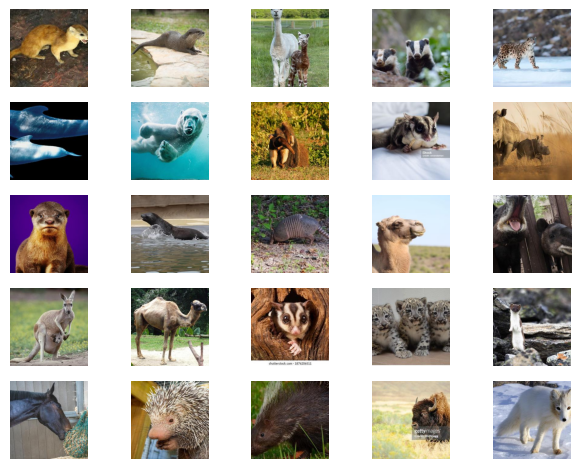

In [51]:
img_paths = df.sample(25)['image']

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, img_path in zip(axes.flatten(), img_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

fig.tight_layout()

### 1.4.3 Adding labels

To make it more insightful, we can put the corresponding label on top of each image. To access the label of an image in the iteration, we'll need to iterate over entire rows of the DataFrame, as each row contains information on both the image and the corresponding label. To iterate over the rows of a DataFrame, you can use [`DataFrame.iterrows()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html):

In [52]:
df_sample = df.sample(10)

for idx, row in df_sample.iterrows():
    print('index:', idx)
    print('row:', row)
    print()

index: 8630
row: image    ../data/mammals/data/rhinoceros/rhinoceros-026...
label                                           rhinoceros
Name: 8630, dtype: object

index: 1642
row: image    ../data/mammals/data/seal/seal-0049.jpg
label                                       seal
Name: 1642, dtype: object

index: 3017
row: image    ../data/mammals/data/baboon/baboon-0062.jpg
label                                         baboon
Name: 3017, dtype: object

index: 13242
row: image    ../data/mammals/data/jackal/jackal-0078.jpg
label                                         jackal
Name: 13242, dtype: object

index: 4930
row: image    ../data/mammals/data/arctic_fox/arctic_fox-002...
label                                           arctic_fox
Name: 4930, dtype: object

index: 7460
row: image    ../data/mammals/data/american_bison/american_b...
label                                       american_bison
Name: 7460, dtype: object

index: 12345
row: image    ../data/mammals/data/squirrel/squirrel-0204

We can now access both the image path and the label of each row in the sampled DataFrame:

In [53]:
for idx, row in df_sample.iterrows():
    print('image:', row['image'])
    print('label:', row['label'])
    print()

image: ../data/mammals/data/rhinoceros/rhinoceros-0264.jpg
label: rhinoceros

image: ../data/mammals/data/seal/seal-0049.jpg
label: seal

image: ../data/mammals/data/baboon/baboon-0062.jpg
label: baboon

image: ../data/mammals/data/jackal/jackal-0078.jpg
label: jackal

image: ../data/mammals/data/arctic_fox/arctic_fox-0029.jpg
label: arctic_fox

image: ../data/mammals/data/american_bison/american_bison-0254.jpg
label: american_bison

image: ../data/mammals/data/squirrel/squirrel-0204.jpg
label: squirrel

image: ../data/mammals/data/weasel/weasel-0110.jpg
label: weasel

image: ../data/mammals/data/mongoose/mongoose-0136.jpg
label: mongoose

image: ../data/mammals/data/badger/badger-0221.jpg
label: badger



Now, to put the mammals name on top of each image, we can use [`Axes.set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html).

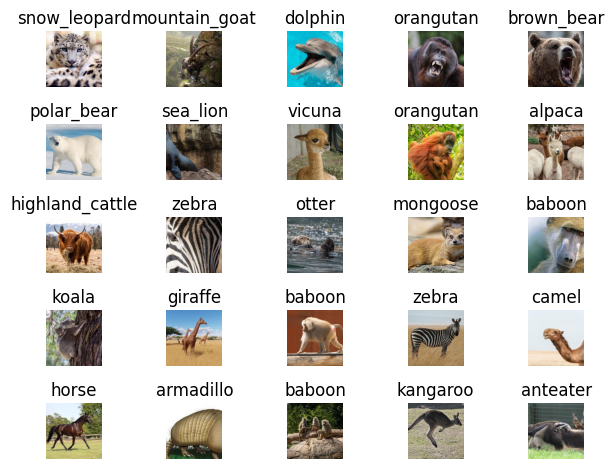

In [54]:
df_sample = df.sample(25)

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
    img_path = row['image']
    label = row['label']

    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

    # Put the label on top of the Axes
    ax.set_title(label)

fig.tight_layout()

### 1.4.4 Visualizing images with a particular label

Another interesting inspection is to visualize some random images of a **particular label**. To get all DataFrame rows that belong to a certain label, you can use the following code:

In [55]:
df[df['label'] == 'squirrel']

image     label
12144  ../data/mammals/data/squirrel/squirrel-0168.jpg  squirrel
12145  ../data/mammals/data/squirrel/squirrel-0068.jpg  squirrel
12146  ../data/mammals/data/squirrel/squirrel-0219.jpg  squirrel
12147  ../data/mammals/data/squirrel/squirrel-0223.jpg  squirrel
12148  ../data/mammals/data/squirrel/squirrel-0052.jpg  squirrel
...                                                ...       ...
12464  ../data/mammals/data/squirrel/squirrel-0070.jpg  squirrel
12465  ../data/mammals/data/squirrel/squirrel-0240.jpg  squirrel
12466  ../data/mammals/data/squirrel/squirrel-0231.jpg  squirrel
12467  ../data/mammals/data/squirrel/squirrel-0120.jpg  squirrel
12468  ../data/mammals/data/squirrel/squirrel-0232.jpg  squirrel

[325 rows x 2 columns]

Now, we can just sample from these rows and run the same code as before.

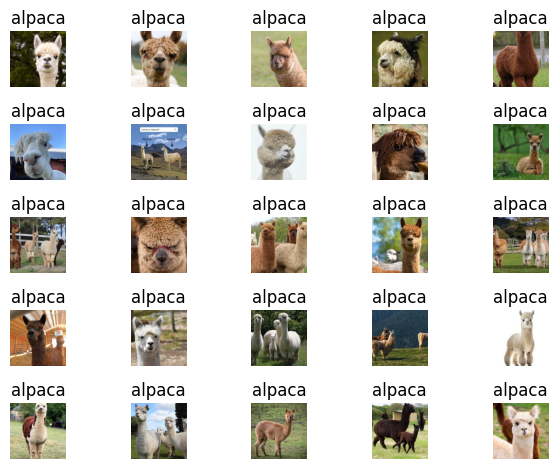

In [56]:
df_sample = df[df['label'] == 'alpaca'].sample(25)

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
    img_path = row['image']
    label = row['label']

    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_title(label)

fig.tight_layout()

## 1.5 Inspecting data transforms

### 1.5.1 Transform images to the same size

When visualizing the images in the dataset, you might have noticed that the images have all kinds of sizes. When training a neural network, we'll want to create *batches* of images. Such a batch can only be created from images of the **same size**. Before we can start training, thus, we'll need a way to give each image the same size.

The [`torchvision` library](https://pytorch.org/vision/stable/index.html) contains some handy tools to help us with that. More specifically, we can make use of the transforms in [`torchvision.transforms.v2`](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html). For example, with [`v2.Resize`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Resize.html#torchvision.transforms.v2.Resize), we can resize an image to a fixed size.

In [57]:
from torchvision.transforms import v2

resize = v2.Resize(224, antialias=True)

To apply this resize transform to an image, we simply call the transform with the image as an argument:

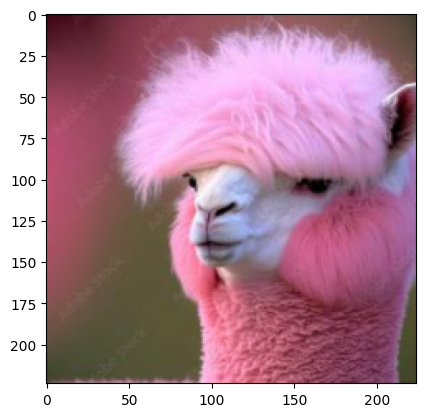

In [58]:
img_path = df['image'][10]
img = Image.open(img_path)

# Apply transform
img = resize(img)

fig, ax = plt.subplots()
ax.imshow(img)

As you can see, `Resize()` has resized our image such that the smallest size became equal to `224`. You can also pass in a width and height to `Resize()`, but this might change the aspect ratio of your image:

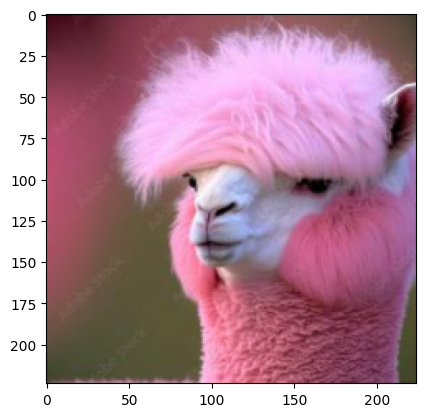

In [59]:
img_path = df['image'][10]
img = Image.open(img_path)

# Create transform
resize = v2.Resize((224, 224), antialias=True)

# Apply transform
img = resize(img)

fig, ax = plt.subplots()
ax.imshow(img)

What if we want all images to be of size $224\times 224$, but don't want our aspect ratio to drastically change? Well, we can resize the shortest side of the image to a fixed size and then **crop** out the center square.

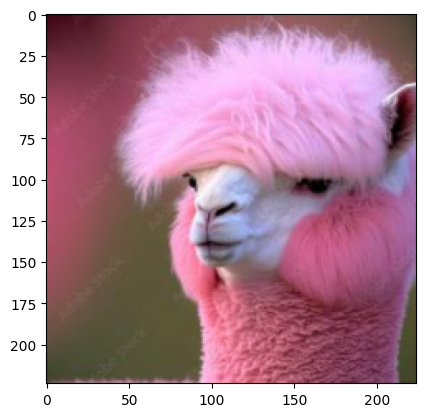

In [60]:
img_path = df['image'][10]
img = Image.open(img_path)

# Create transforms
resize = v2.Resize(224, antialias=True)
crop = v2.CenterCrop(224)

# Apply transforms
img = resize(img)
img = crop(img)

fig, ax = plt.subplots()
ax.imshow(img)

An easier way to apply a chain of transforms to an image is with [`v2.Compose`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose):

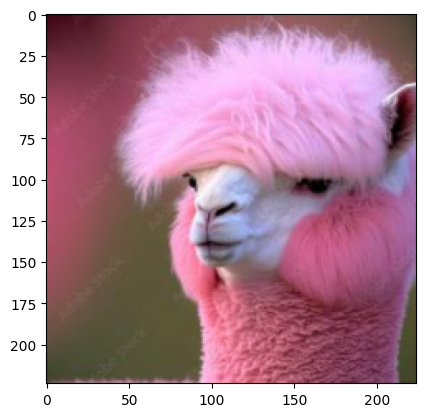

In [61]:
img_path = df['image'][10]
img = Image.open(img_path)

# Create transforms
transforms = v2.Compose([
    v2.Resize(224, antialias=True),
    v2.CenterCrop(224)
])

# Apply transforms
img = transforms(img)

fig, ax = plt.subplots()
ax.imshow(img)

We can also apply this transform to multiple images:

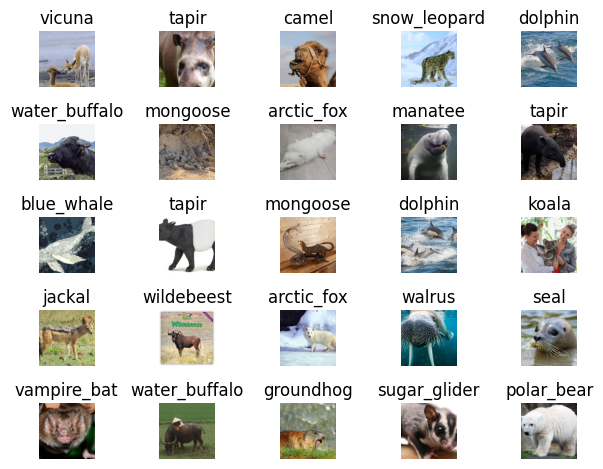

In [62]:
# Randomly sample 25 images
df_sample = df.sample(25)

# Create (empty) subplots for the images
fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
    img_path = row['image']    # The image path
    label = row['label']  # The mammals name

    # Open image
    img = Image.open(img_path)

    # Apply transforms
    img = transforms(img)

    # Put image in Axes
    ax.imshow(img)
    ax.set_title(label)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

fig.tight_layout()

### 1.5.2 Data augmentation

Apart from ensuring that all images can be put in a batch, another important use of data transforms is to **augment the dataset**. The idea of *data augmentation* is to apply image transforms that our model should be invariant against. If a certain image is somewhat zoomed in, the aspect ratio has changed slightly, or the image is rotated by 10°, for example, we still want our model to recognize the mammals.

Let's first put our image visualization logic inside a utility function.

In [74]:
import torch
from torchvision.io import ImageReadMode


def visualize_df(df, transform=None, ncols=5):
    ncols = min(ncols, len(df))
    nrows = len(df) // ncols

    # Create (empty) subplots for the images
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows)

    for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
        img_path = row['image']  # The image path
        label = row['label']     # The mammals name

        # Open image
        img = Image.open(img_path)

        # Apply transforms
        if transform is not None:
            img = transform(img)

        # Put image in Axes
        if isinstance(img, torch.Tensor):
            ax.imshow(img.permute(1, 2, 0))  # C, H, W -> H, W, C
        else:
            ax.imshow(img)
        ax.set_title(label)
        ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

    fig.tight_layout()

Next, we sample some images from the DataFrame and show them without any transforms.

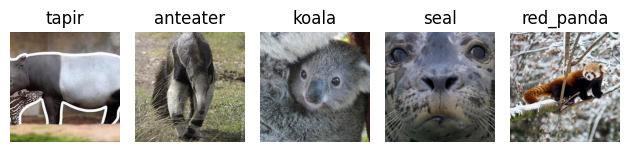

In [75]:
# Randomly sample 25 images
df_sample = df.sample(5)
visualize_df(df_sample)

Let's now play around with some combinations of transforms and visualize their effect on the images. See [this page](https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended) for an overview of the available image transforms.

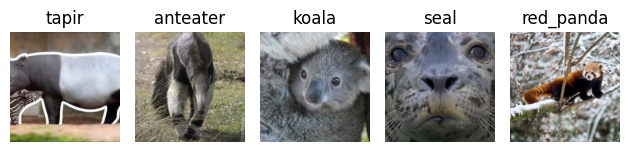

In [76]:
transforms_1 = v2.Compose([
    v2.Resize(224, antialias=True),
    v2.CenterCrop(224),
])

visualize_df(df_sample, transforms_1)

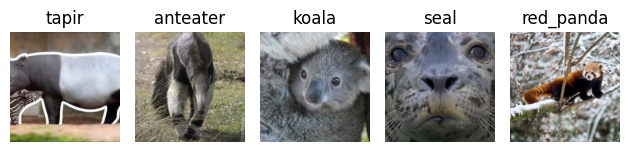

In [79]:
transforms_2 = v2.Compose([
    v2.Resize(224, antialias=True),
    v2.RandomCrop(224),
])

visualize_df(df_sample, transforms_1)

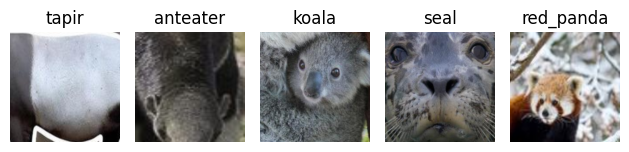

In [80]:
transforms_3 = v2.Compose([
    v2.RandomResizedCrop(224, antialias=True),
])

visualize_df(df_sample, transforms_3)

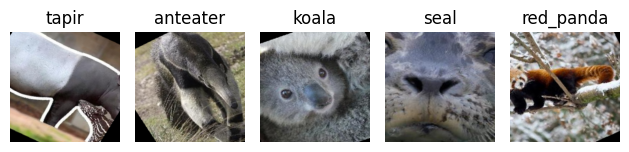

In [81]:
transforms_3 = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomRotation(30),
    v2.RandomResizedCrop(224, antialias=True),
])

visualize_df(df_sample, transforms_3)

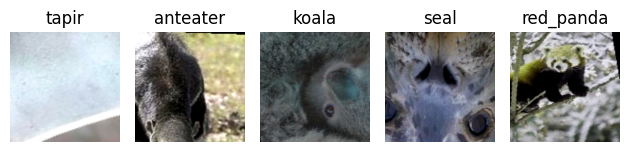

In [88]:
color_jitter = v2.ColorJitter(brightness=0.4, contrast=0.3, saturation=0.4, hue=0.1)
transforms_3 = v2.Compose([
    v2.RandomVerticalFlip(),
    v2.RandomRotation(30),
    v2.RandomResizedCrop(224, antialias=True),
    color_jitter
])

visualize_df(df_sample, transforms_3)

### 1.5.3 Data type conversion and normalization

Our images are [`PIL.Image` instances](https://pillow.readthedocs.io/en/stable/reference/Image.html). Our neural network, however, will expect `torch.Tensor` objects with `torch.float32` numbers that are (roughly) normally distributed with zero mean and unit variance.

To convert a `PIL.Image` to a PyTorch tensor, you can use [`v2.ToImage()`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToImage.html). The name of this transform might be somewhat confusing at first sight, but it is named so because it converts the input into a [`torchvision.tv_tensors.Image`](https://pytorch.org/vision/main/generated/torchvision.tv_tensors.Image.html#torchvision.tv_tensors.Image) instance, which is a subclass of [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) for images.

In [69]:
import torch

to_torch_img = v2.ToImage()

torch_img = to_torch_img(img)

torch_img

Image([[[69, 69, 69,  ..., 30, 30, 30],
        [72, 72, 72,  ..., 29, 29, 29],
        [74, 74, 75,  ..., 28, 28, 28],
        ...,
        [51, 50, 49,  ..., 53, 51, 48],
        [51, 51, 50,  ..., 54, 54, 53],
        [52, 51, 51,  ..., 57, 57, 56]],

       [[70, 70, 70,  ..., 19, 19, 19],
        [73, 73, 73,  ..., 18, 18, 18],
        [77, 76, 76,  ..., 17, 17, 17],
        ...,
        [77, 76, 75,  ..., 56, 51, 46],
        [77, 77, 76,  ..., 54, 49, 44],
        [77, 76, 77,  ..., 52, 47, 44]],

       [[64, 63, 62,  ..., 17, 17, 17],
        [67, 66, 65,  ..., 16, 16, 16],
        [68, 67, 68,  ..., 15, 15, 15],
        ...,
        [62, 62, 61,  ..., 40, 36, 32],
        [67, 66, 64,  ..., 41, 38, 34],
        [70, 69, 67,  ..., 43, 40, 37]]], dtype=torch.uint8, )

As you can see, the data stored in our `PIL.Image` consists of 8 bit unsigned integers (0 - 255). To convert this to `torch.float32` numbers, we can use the [`v2.ToDtype()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToDtype.html#torchvision.transforms.v2.ToDtype) transform.

In [70]:
to_float32 = v2.ToDtype(torch.float32)

to_float32(torch_img)

Image([[[69., 69., 69.,  ..., 30., 30., 30.],
        [72., 72., 72.,  ..., 29., 29., 29.],
        [74., 74., 75.,  ..., 28., 28., 28.],
        ...,
        [51., 50., 49.,  ..., 53., 51., 48.],
        [51., 51., 50.,  ..., 54., 54., 53.],
        [52., 51., 51.,  ..., 57., 57., 56.]],

       [[70., 70., 70.,  ..., 19., 19., 19.],
        [73., 73., 73.,  ..., 18., 18., 18.],
        [77., 76., 76.,  ..., 17., 17., 17.],
        ...,
        [77., 76., 75.,  ..., 56., 51., 46.],
        [77., 77., 76.,  ..., 54., 49., 44.],
        [77., 76., 77.,  ..., 52., 47., 44.]],

       [[64., 63., 62.,  ..., 17., 17., 17.],
        [67., 66., 65.,  ..., 16., 16., 16.],
        [68., 67., 68.,  ..., 15., 15., 15.],
        ...,
        [62., 62., 61.,  ..., 40., 36., 32.],
        [67., 66., 64.,  ..., 41., 38., 34.],
        [70., 69., 67.,  ..., 43., 40., 37.]]], )

But as you can see, these numbers are still between 0 and 255. If we pass `scale=True`, the numbers will be scaled between `0.0` and `1.0`:

In [71]:
to_float32 = v2.ToDtype(torch.float32, scale=True)

float32_img = to_float32(torch_img)

float32_img

Image([[[0.2706, 0.2706, 0.2706,  ..., 0.1176, 0.1176, 0.1176],
        [0.2824, 0.2824, 0.2824,  ..., 0.1137, 0.1137, 0.1137],
        [0.2902, 0.2902, 0.2941,  ..., 0.1098, 0.1098, 0.1098],
        ...,
        [0.2000, 0.1961, 0.1922,  ..., 0.2078, 0.2000, 0.1882],
        [0.2000, 0.2000, 0.1961,  ..., 0.2118, 0.2118, 0.2078],
        [0.2039, 0.2000, 0.2000,  ..., 0.2235, 0.2235, 0.2196]],

       [[0.2745, 0.2745, 0.2745,  ..., 0.0745, 0.0745, 0.0745],
        [0.2863, 0.2863, 0.2863,  ..., 0.0706, 0.0706, 0.0706],
        [0.3020, 0.2980, 0.2980,  ..., 0.0667, 0.0667, 0.0667],
        ...,
        [0.3020, 0.2980, 0.2941,  ..., 0.2196, 0.2000, 0.1804],
        [0.3020, 0.3020, 0.2980,  ..., 0.2118, 0.1922, 0.1725],
        [0.3020, 0.2980, 0.3020,  ..., 0.2039, 0.1843, 0.1725]],

       [[0.2510, 0.2471, 0.2431,  ..., 0.0667, 0.0667, 0.0667],
        [0.2627, 0.2588, 0.2549,  ..., 0.0627, 0.0627, 0.0627],
        [0.2667, 0.2627, 0.2667,  ..., 0.0588, 0.0588, 0.0588],
        ..

Now, with [`v2.Normalize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Normalize.html#torchvision.transforms.v2.Normalize), we can normalize our pixel values so that they'll approximately have zero mean and unit variance. `Normalize` expects two arguments: `mean` (the mean to subtract) and `std` (the standard deviation to divide by). We will use `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. These values are the mean and std of [the ImageNet dataset](https://www.image-net.org/index.php), which is often used to pretrain neural networks.

In [72]:
normalize = v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

normalize(float32_img)

Image([[[-0.9363, -0.9363, -0.9363,  ..., -1.6042, -1.6042, -1.6042],
        [-0.8849, -0.8849, -0.8849,  ..., -1.6213, -1.6213, -1.6213],
        [-0.8507, -0.8507, -0.8335,  ..., -1.6384, -1.6384, -1.6384],
        ...,
        [-1.2445, -1.2617, -1.2788,  ..., -1.2103, -1.2445, -1.2959],
        [-1.2445, -1.2445, -1.2617,  ..., -1.1932, -1.1932, -1.2103],
        [-1.2274, -1.2445, -1.2445,  ..., -1.1418, -1.1418, -1.1589]],

       [[-0.8102, -0.8102, -0.8102,  ..., -1.7031, -1.7031, -1.7031],
        [-0.7577, -0.7577, -0.7577,  ..., -1.7206, -1.7206, -1.7206],
        [-0.6877, -0.7052, -0.7052,  ..., -1.7381, -1.7381, -1.7381],
        ...,
        [-0.6877, -0.7052, -0.7227,  ..., -1.0553, -1.1429, -1.2304],
        [-0.6877, -0.6877, -0.7052,  ..., -1.0903, -1.1779, -1.2654],
        [-0.6877, -0.7052, -0.6877,  ..., -1.1253, -1.2129, -1.2654]],

       [[-0.6890, -0.7064, -0.7238,  ..., -1.5081, -1.5081, -1.5081],
        [-0.6367, -0.6541, -0.6715,  ..., -1.5256, -1.5256, 

We can again chain these transforms with `v2.Compose()`:

In [73]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transforms(img)

Image([[[-0.9363, -0.9363, -0.9363,  ..., -1.6042, -1.6042, -1.6042],
        [-0.8849, -0.8849, -0.8849,  ..., -1.6213, -1.6213, -1.6213],
        [-0.8507, -0.8507, -0.8335,  ..., -1.6384, -1.6384, -1.6384],
        ...,
        [-1.2445, -1.2617, -1.2788,  ..., -1.2103, -1.2445, -1.2959],
        [-1.2445, -1.2445, -1.2617,  ..., -1.1932, -1.1932, -1.2103],
        [-1.2274, -1.2445, -1.2445,  ..., -1.1418, -1.1418, -1.1589]],

       [[-0.8102, -0.8102, -0.8102,  ..., -1.7031, -1.7031, -1.7031],
        [-0.7577, -0.7577, -0.7577,  ..., -1.7206, -1.7206, -1.7206],
        [-0.6877, -0.7052, -0.7052,  ..., -1.7381, -1.7381, -1.7381],
        ...,
        [-0.6877, -0.7052, -0.7227,  ..., -1.0553, -1.1429, -1.2304],
        [-0.6877, -0.6877, -0.7052,  ..., -1.0903, -1.1779, -1.2654],
        [-0.6877, -0.7052, -0.6877,  ..., -1.1253, -1.2129, -1.2654]],

       [[-0.6890, -0.7064, -0.7238,  ..., -1.5081, -1.5081, -1.5081],
        [-0.6367, -0.6541, -0.6715,  ..., -1.5256, -1.5256, 

And we can prepend them with other transforms:

In [87]:
transforms = v2.Compose([
    v2.RandomResizedCrop(224, antialias=True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transforms(img)

Image([[[ 0.2796,  0.2624,  0.2282,  ..., -0.1657, -0.1657, -0.1828],
        [ 0.2453,  0.2282,  0.1939,  ..., -0.1657, -0.1657, -0.1828],
        [ 0.2111,  0.1939,  0.1597,  ..., -0.1657, -0.1657, -0.1828],
        ...,
        [-0.9877, -1.0733, -1.1760,  ..., -0.0287,  0.0056,  0.0398],
        [-1.0219, -1.1075, -1.1932,  ...,  0.0227,  0.0569,  0.0741],
        [-1.0562, -1.1418, -1.2103,  ...,  0.0398,  0.0741,  0.0912]],

       [[-0.1099, -0.1275, -0.1625,  ..., -0.5126, -0.5126, -0.5126],
        [-0.1450, -0.1625, -0.1800,  ..., -0.5126, -0.5126, -0.5126],
        [-0.1800, -0.1975, -0.2150,  ..., -0.5126, -0.5126, -0.5126],
        ...,
        [-1.5630, -1.5980, -1.6155,  ..., -0.2500, -0.2150, -0.1975],
        [-1.5630, -1.5980, -1.6331,  ..., -0.2150, -0.1800, -0.1625],
        [-1.5805, -1.6155, -1.6506,  ..., -0.1975, -0.1625, -0.1450]],

       [[-0.3055, -0.3230, -0.3578,  ..., -0.5495, -0.5495, -0.5495],
        [-0.3404, -0.3404, -0.3578,  ..., -0.5495, -0.5495, 

For some transforms, you might gain a small amount of processing time by moving `v2.ToImage()` to the beginning of the transforms list, as the subsequent transforms will then be applied directly to PyTorch tensors instead of PIL images. Therefore, it is customary to use `v2.ToImage()` as the first transform.

In [88]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.RandomResizedCrop(224, antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transforms(img)

Image([[[ 0.8961,  0.8961,  0.8961,  ...,  1.0331,  1.0502,  1.0502],
        [ 0.8789,  0.8789,  0.8789,  ...,  1.0502,  1.0673,  1.0673],
        [ 0.8618,  0.8618,  0.8618,  ...,  1.0844,  1.1015,  1.1015],
        ...,
        [-0.7308, -0.7308, -0.6965,  ...,  0.4508,  0.8104,  1.0331],
        [-0.8678, -0.8507, -0.7822,  ...,  0.3823,  0.7591,  0.9988],
        [-0.9705, -0.9363, -0.8678,  ...,  0.3309,  0.7419,  0.9988]],

       [[ 0.4153,  0.4153,  0.4153,  ...,  0.5553,  0.5728,  0.5728],
        [ 0.3978,  0.3978,  0.3978,  ...,  0.5728,  0.5903,  0.5903],
        [ 0.3978,  0.3978,  0.3978,  ...,  0.5903,  0.6078,  0.6078],
        ...,
        [-1.4755, -1.4580, -1.4580,  ...,  0.2577,  0.5203,  0.6954],
        [-1.5455, -1.5280, -1.5105,  ...,  0.2052,  0.4853,  0.6604],
        [-1.5980, -1.5805, -1.5630,  ...,  0.1702,  0.4853,  0.6779]],

       [[ 0.0779,  0.0779,  0.0779,  ...,  0.1825,  0.1999,  0.1999],
        [ 0.0605,  0.0605,  0.0605,  ...,  0.1999,  0.2173, 

Note that these normalized tensors cannot really be visualized directly, as the data range extends beyond $[0.0, 1.0]$ and the pixels will need to be clipped. These values won't be clipped for the neural network, however, so a visualization will not really be representative of what the neural network will actually receive.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


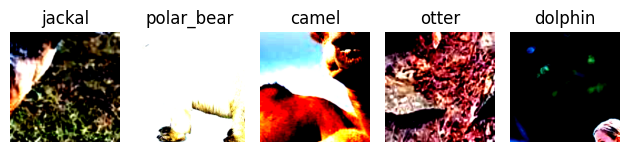

In [89]:
show_df_imgs(df_sample, transforms)